In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/drive/MyDrive/winequality/WineQT.csv'
data = pd.read_csv(file_path)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('Confusion Matrix:')
    print(cm)


    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

X_train, X_test, y_train, y_test

(array([[ 0.10813236, -1.39978919,  1.48339955, ...,  0.54186214,
          0.05351522, -1.70111992],
        [ 0.90958396, -1.17701572,  1.48339955, ...,  0.42443899,
          0.88552188,  0.58437704],
        [ 0.33711853, -1.23270909,  0.46610448, ...,  0.18959268,
          1.25530262,  0.2048983 ],
        ...,
        [-0.52157961, -1.00993562,  0.31351022, ..., -0.33881152,
          1.34774781,  1.67106616],
        [-0.2353469 ,  0.21531845,  0.21178072, ...,  0.18959268,
         -0.87093663,  0.88623513],
        [-0.46433307, -0.06314838,  0.6695635 , ..., -0.10396521,
          1.25530262,  1.66028551]]),
 array([[-0.86505887,  0.43809192, -1.16156762, ..., -0.33881152,
         -0.87093663, -1.2569573 ],
        [-0.80781233,  1.71903936, -0.29686681, ...,  0.36572741,
         -1.11745712,  1.52876163],
        [-0.75056579,  0.27101182, -0.75464959, ..., -1.04335045,
          0.05351522, -0.83651211],
        ...,
        [-0.86505887,  1.35703247, -1.36502663, ..., -

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Logistic Regression:
Accuracy: 0.6375545851528385
Precision: 0.616300080552847
Recall: 0.6375545851528385
F1 Score: 0.6265327837922381
Confusion Matrix:
[[ 0  3  3  0  0]
 [ 1 70 23  2  0]
 [ 0 28 63  8  0]
 [ 0  2 11 13  0]
 [ 0  0  0  2  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


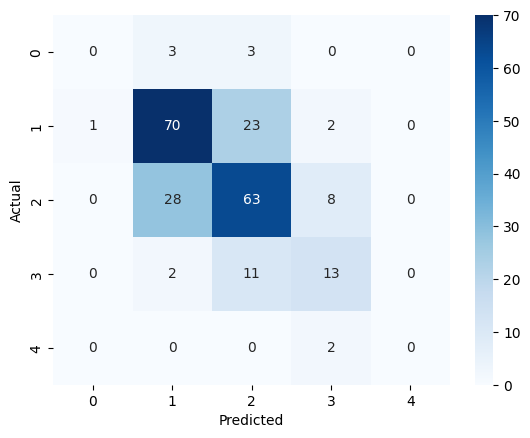

In [ ]:
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression:")
log_reg_evaluation = evaluate_model(y_test, y_pred_log_reg)
log_reg_evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Decision Tree:
Accuracy: 0.5633187772925764
Precision: 0.5773341651070908
Recall: 0.5633187772925764
F1 Score: 0.564395301590267
Confusion Matrix:
[[ 0  0  0  0  0  0]
 [ 0  2  2  1  1  0]
 [ 0  3 63 27  3  0]
 [ 2  0 31 45 19  2]
 [ 0  0  0  8 18  0]
 [ 0  0  0  0  1  1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


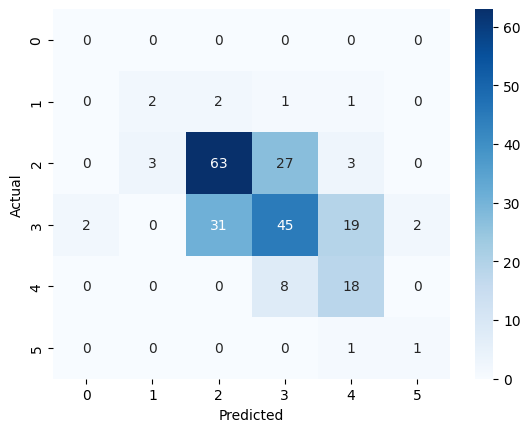

In [ ]:
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree:")
evaluate_model(y_test, y_pred_tree)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest:
Accuracy: 0.6855895196506551
Precision: 0.6651448987693529
Recall: 0.6855895196506551
F1 Score: 0.6732079428171281
Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 70  5  0]
 [ 0  0 11 15  0]
 [ 0  0  2  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


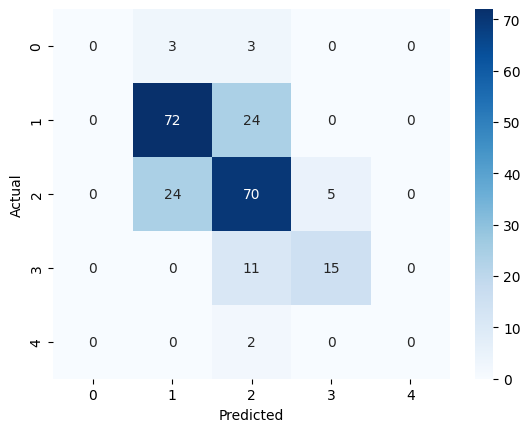

In [ ]:
y_pred_forest = forest_model.predict(X_test)
print("Random Forest:")
evaluate_model(y_test, y_pred_forest)

SVM:
Accuracy: 0.611353711790393
Precision: 0.5740664451218953
Recall: 0.611353711790393
F1 Score: 0.5892151641783564
Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 73 22  1  0]
 [ 0 30 62  7  0]
 [ 0  2 19  5  0]
 [ 0  0  0  2  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


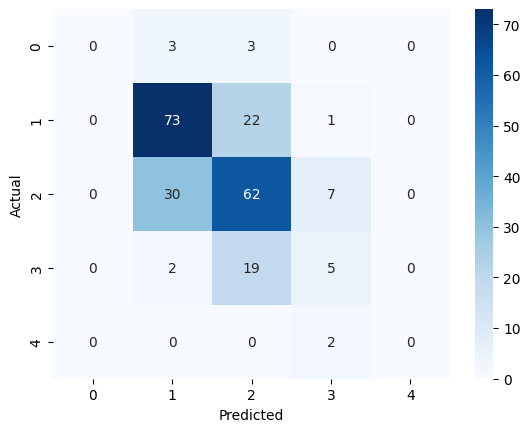

In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate SVM
y_pred_svm = svm_model.predict(X_test)
print("SVM:")
svm_evaluation = evaluate_model(y_test, y_pred_svm)
svm_evaluation